<a href="https://colab.research.google.com/github/rajitbasu/Deep_Learning/blob/main/DL_Assignment4_Q1_20MAI0019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RAJIT_BASU_20MAI0019
# GitHub Link

https://github.com/rajitbasu/Deep_Learning/blob/main/DL_Assignment4_Q1_20MAI0019.ipynb


In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [3]:
AlexNet = Sequential()
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [4]:
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [5]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)


#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

170500096/170498071 [==============================] - 2s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [6]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))


((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [7]:
batch_size= 100
epochs=5
#Training the model
AlexNet.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_val, y_val))

Epoch 1/5
350/350 [==============================] - 42s 23ms/step - loss: 1.8122 - accuracy: 0.3422 - val_loss: 1.9572 - val_accuracy: 0.3419
Epoch 2/5
350/350 [==============================] - 8s 22ms/step - loss: 1.4098 - accuracy: 0.5067 - val_loss: 1.7271 - val_accuracy: 0.4021
Epoch 3/5
350/350 [==============================] - 8s 22ms/step - loss: 1.2481 - accuracy: 0.5673 - val_loss: 1.6092 - val_accuracy: 0.4310
Epoch 4/5
350/350 [==============================] - 8s 22ms/step - loss: 1.1257 - accuracy: 0.6129 - val_loss: 1.4338 - val_accuracy: 0.5078
Epoch 5/5
350/350 [==============================] - 8s 22ms/step - loss: 1.0124 - accuracy: 0.6597 - val_loss: 1.4391 - val_accuracy: 0.5027


In [8]:
AlexNet.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4596 - accuracy: 0.4981


[1.4596335887908936, 0.49810001254081726]

In [9]:
!mkdir -p saved_model
AlexNet.save('saved_model/AlexNet_Model.h5')

In [10]:
## AlexNet using Transfer Learning
import tensorflow as tf
import os

In [11]:
Base_model = tf.keras.models.load_model('saved_model/AlexNet_Model.h5')

In [12]:
nb_train_samples =60000
nb_valid_samples =10000
num_classes = 10

In [13]:
(X_train,Y_train), (X_valid, Y_valid) = tf.keras.datasets.mnist.load_data()

# expand new axis, channel axis 
X_train = np.expand_dims(X_train, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
X_train = np.repeat(X_train, 3, axis=-1)

# it's always better to normalize 
X_train = X_train.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
X_train = tf.image.resize(X_train, [32,32]) # if we want to resize 

print(X_train.shape)

X_valid = np.expand_dims(X_valid, axis=-1)

# [optional]: we may need 3 channel (instead of 1)
X_valid = np.repeat(X_valid, 3, axis=-1)

# it's always better to normalize 
X_valid = X_valid.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 32
X_valid = tf.image.resize(X_valid, [32,32]) # if we want to resize 

print(X_valid.shape)

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], num_classes)
Y_valid = np_utils.to_categorical(Y_valid[:nb_valid_samples], num_classes)

print((X_train.shape,Y_train.shape))
print((X_valid.shape,Y_valid.shape))

11493376/11490434 [==============================] - 0s 0us/step
(60000, 32, 32, 3)
(10000, 32, 32, 3)
(TensorShape([60000, 32, 32, 3]), (60000, 10))
(TensorShape([10000, 32, 32, 3]), (10000, 10))


In [14]:
from keras.models import load_model
new_model = load_model('saved_model/AlexNet_Model.h5')

In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)         0

In [16]:
new_model.trainable=False
model = tf.keras.Sequential([
    new_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                25730506  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 25,730,616
Trainable params: 110
Non-trainable params: 25,730,506
_________________________________________________________________


In [17]:
history = model.fit(X_train, Y_train,
batch_size=batch_size,
epochs=10,
verbose=1,
validation_data=(X_valid, Y_valid))

Epoch 1/10
600/600 [==============================] - 6s 9ms/step - loss: 2.3068 - accuracy: 0.1080 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3017 - accuracy: 0.1122 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3014 - accuracy: 0.1143 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3014 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3019 - accuracy: 0.1095 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3010 - accuracy: 0.1153 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 2.3013 - accuracy: 0.1130 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 

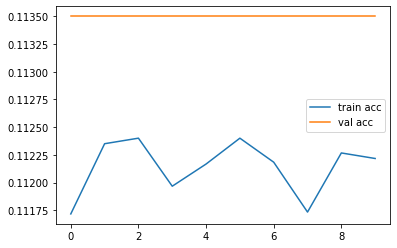

<Figure size 432x288 with 0 Axes>

In [20]:
#accuracies
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

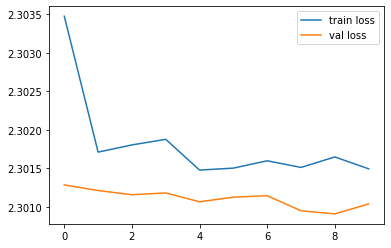

<Figure size 432x288 with 0 Axes>

In [21]:
# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
